## Vanilla MLP

by Jeremy Tan, Benjamin Ang

In [10]:
# !pip install ucimlrepo
# !pip install optuna

In [11]:
# Core Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import optuna

# Data Handling and Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# Dataset Fetching
from ucimlrepo import fetch_ucirepo


In [12]:
# Fetch Dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
Y = breast_cancer_wisconsin_diagnostic.data.targets

# Normalize the features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), 
                        columns=X.columns, 
                        index=X.index)
# Assign the value of 1 to Malignant, assign 0 to Benign
Y.loc[:, 'Diagnosis'] = Y['Diagnosis'].map({'M': 1, 'B': 0})


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


c:\users\jeremy tan\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


In [51]:
pd.set_option('display.max_columns', 10)  # Shows first 5 and last 5 columns


In [52]:
final_dataset = pd.concat([X, Y], axis=1)
final_dataset

,radius1,texture1,perimeter1,area1,smoothness1,...,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,...,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,...,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,...,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,...,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,...,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,...,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,...,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,...,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,...,3.197605,2.289985,1.919083,2.219635,1


In [13]:
Y.value_counts()

Diagnosis
0            357
1            212
dtype: int64

In [14]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader

# Custom PyTorch Dataset
class CustomDataset(Dataset):
    def __init__(self, x_train, y_train):
        # Convert NumPy array to a PyTorch tensor
        self.data_x = torch.tensor(x_train, dtype=torch.float32)
        self.data_y = torch.tensor(y_train, dtype=torch.float32)

    def __len__(self):
        # Return the number of samples (n)
        return self.data_x.shape[0]

    def __getitem__(self, idx):
        # Get the m-dimensional data point at index `idx`
        return self.data_x[idx], self.data_y[idx]

# Get the numpy values from df x and y
x_train = X_train.values.astype(np.float32)
y_train = Y_train.values.astype(np.float32)

# Create the training dataset
training_dataset = CustomDataset(x_train, y_train)

# Example usage with DataLoader
train_loader = DataLoader(training_dataset, batch_size=32, shuffle=True)

In [15]:
# Dimensions of training dataset
x1,y1 = next(iter(train_loader))
print(x1.shape)
print(y1.shape)

torch.Size([32, 30])
torch.Size([32, 1])


In [30]:
import torch

class MultiLayerPerceptron(torch.nn.Module):
  # Constructor
    def __init__(self, in_dimensions, out_dimensions):
        super().__init__()
        self.in_dimensions = in_dimensions
        self.out_dimensions = out_dimensions

        self.input_to_hidden_a = torch.nn.Linear(self.in_dimensions, 10)
        self.hidden_a_to_b = torch.nn.Linear(10, 7)
        self.hidden_b_to_output = torch.nn.Linear(7, self.out_dimensions)

        self.relu = torch.nn.ReLU()
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.input_to_hidden_a.forward(x)
        x = self.relu(x)

        x = self.hidden_a_to_b.forward(x)
        x = self.relu(x)

        x = self.hidden_b_to_output.forward(x)
        x = self.sigmoid(x)

        return x




In [31]:
model = MultiLayerPerceptron(30,1)

x = torch.rand(2, 30)

y = model.forward(x)

print(y)

tensor([[0.5664],
        [0.5718]], grad_fn=<SigmoidBackward0>)


Epoch [1/20], Loss: 0.7078
Epoch [2/20], Loss: 0.7051
Epoch [3/20], Loss: 0.7010
Epoch [4/20], Loss: 0.6964
Epoch [5/20], Loss: 0.6928
Epoch [6/20], Loss: 0.6880
Epoch [7/20], Loss: 0.6842
Epoch [8/20], Loss: 0.6790
Epoch [9/20], Loss: 0.6752
Epoch [10/20], Loss: 0.6704
Epoch [11/20], Loss: 0.6671
Epoch [12/20], Loss: 0.6617
Epoch [13/20], Loss: 0.6572
Epoch [14/20], Loss: 0.6531
Epoch [15/20], Loss: 0.6472
Epoch [16/20], Loss: 0.6417
Epoch [17/20], Loss: 0.6353
Epoch [18/20], Loss: 0.6328
Epoch [19/20], Loss: 0.6252
Epoch [20/20], Loss: 0.6211


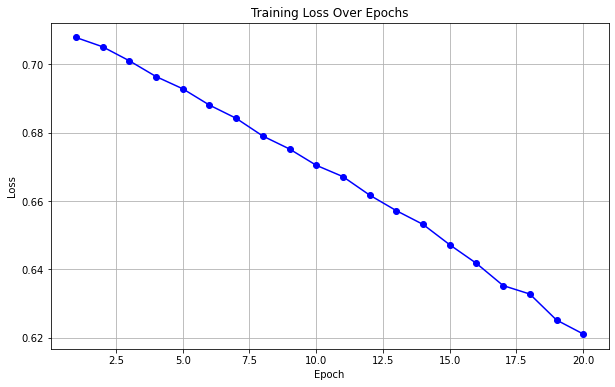

In [32]:
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt

# Number of epochs
num_epochs = 20

# Define the model
# 30 input features
model = MultiLayerPerceptron(30, 1)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# List to store the loss values
loss_values = []

# Training loop
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for x_batch, y_batch in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x_batch)

        loss = criterion(y_pred, y_batch)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Accumulate the loss
        running_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

    # Append the average loss to the loss_values list
    loss_values.append(avg_loss)

# Plot the loss values
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), loss_values, marker='o', linestyle='-', color='b')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

In [33]:
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# Convert test data to PyTorch tensors (if not already)
x_test = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test = torch.tensor(Y_test.values.astype(np.float32), dtype=torch.float32)

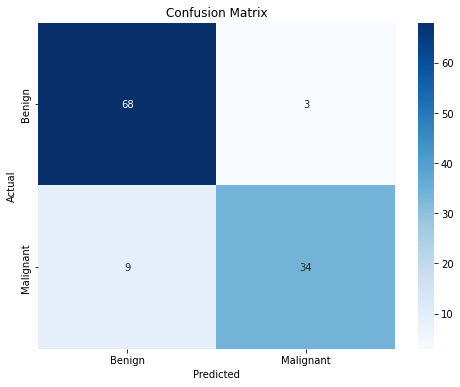

              precision    recall  f1-score   support

      Benign       0.88      0.96      0.92        71
   Malignant       0.92      0.79      0.85        43

    accuracy                           0.89       114
   macro avg       0.90      0.87      0.88       114
weighted avg       0.90      0.89      0.89       114



In [35]:


# Disable gradient computation for evaluation
model.eval()
with torch.no_grad():
    # Get predictions
    test_predictions = model(x_test)
    test_predictions_binary = (test_predictions > 0.5).numpy().flatten()
    
# Convert test labels to numpy
y_test_binary = y_test.flatten()

# Create confusion matrix
cm = confusion_matrix(y_test_binary, test_predictions_binary)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print(classification_report(y_test_binary, test_predictions_binary, 
                             target_names=['Benign', 'Malignant']))

## Bayesian Optimization

Parameters:
1. Learning Rate
2. Number of neurons in the hidden layers - hidden1, hidden2


In [36]:
torch.manual_seed(42)
np.random.seed(42)

In [37]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, in_dimensions, out_dimensions, hidden1, hidden2):
        super().__init__()
        self.input_to_hidden_a = nn.Linear(in_dimensions, hidden1)
        self.hidden_a_to_b = nn.Linear(hidden1, hidden2)
        self.hidden_b_to_output = nn.Linear(hidden2, out_dimensions)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.input_to_hidden_a(x)
        x = self.relu(x)
        
        x = self.hidden_a_to_b(x)
        x = self.relu(x)
        
        x = self.hidden_b_to_output(x)
        x = self.sigmoid(x)
        return x

In [38]:
def objective(trial):
    # Hyperparameters to optimize
    hidden1 = trial.suggest_categorical('hidden1', [8, 10, 16])
    hidden2 = trial.suggest_categorical('hidden2', [6, 7, 14])
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype = torch.float32)
    y_train_tensor = torch.tensor(y_train.values.astype(np.float32), dtype = torch.float32)
    X_val_tensor = torch.tensor(X_val.values.astype(np.float32), dtype = torch.float32)
    y_val_tensor = torch.tensor(y_val.values.astype(np.float32), dtype = torch.float32)
    
    # Create model, loss, and optimizer
    model = MultiLayerPerceptron(30, 1, hidden1, hidden2)
    
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Create the training dataset
    training_dataset = CustomDataset(X_train_tensor, y_train_tensor)

    # Example usage with DataLoader
    train_loader = DataLoader(training_dataset, batch_size=32, shuffle=True)

    # Training
    num_epochs = 20
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_preds = (val_outputs > 0.5).float()
        accuracy = accuracy_score(y_val, val_preds.numpy())
        auc = roc_auc_score(y_val, val_outputs.numpy())
    
    # Report multiple metrics
    trial.set_user_attr('accuracy', accuracy)
    trial.set_user_attr('auc', auc)
    
    return val_loss.item()

In [39]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)
X = breast_cancer_wisconsin_diagnostic.data.features
Y = breast_cancer_wisconsin_diagnostic.data.targets

# Assign the value of 1 to Malignant, assign 0 to Benign
Y.loc[:, 'Diagnosis'] = Y['Diagnosis'].map({'M': 1, 'B': 0})

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), 
                        columns=X.columns, 
                        index=X.index)

# Split the data - 60/20/20 Train Validation Test Split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize', 
                             study_name='Vanilla MLP Optimization')
study.optimize(objective, n_trials=50)

# Print results
print("Best trial:")
trial = study.best_trial
print(f"  Value (Val Loss): {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

# Print additional metrics from the best trial
print("\nBest Trial Metrics:")
print(f"  Accuracy: {trial.user_attrs['accuracy']}")
print(f"  AUC: {trial.user_attrs['auc']}")


c:\users\jeremy tan\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
[I 2024-12-05 17:33:32,405] A new study created in memory with name: Breast Cancer Classifier Optimization
<ipython-input-38-fd7def23e6e1>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-2)
<ipython-input-14-1e5ce8616122>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or source

Best trial:
  Value (Val Loss): 0.11527663469314575
  Params: 
    hidden1: 10
    hidden2: 14
    learning_rate: 0.0017582961268441416

Best Trial Metrics:
  Accuracy: 0.9736842105263158
  AUC: 0.9857142857142858


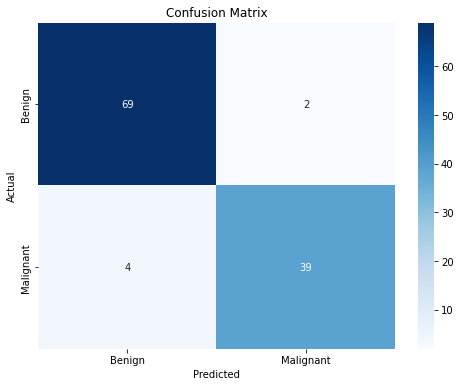

In [40]:
# Get the best trial's parameters
best_params = study.best_trial.params
best_hidden_dim_1 = best_params['hidden1']
best_hidden_dim_2 = best_params['hidden2']
best_learning_rate = best_params['learning_rate']

# Create the model with the best hyperparameters
best_model = MultiLayerPerceptron(30, 1, best_hidden_dim_1, best_hidden_dim_2)

# Convert train and validation data to tensors
X_train_tensor = torch.tensor(X_train.values.astype(np.float32), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.astype(np.float32), dtype=torch.float32)

# Create optimizer with the best learning rate
optimizer = optim.Adam(best_model.parameters(), lr=best_learning_rate)
criterion = nn.BCELoss()

# Retrain the model with best hyperparameters
# Batching is not implemented. 
# The whole training dataset is processed in a single pass. 
num_epochs = 20
for epoch in range(num_epochs):
    best_model.train()
    optimizer.zero_grad()
    outputs = best_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

# Convert test data to tensors
X_test_tensor = torch.tensor(X_test.values.astype(np.float32), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.astype(np.float32), dtype=torch.float32)

# Evaluate on test set
best_model.eval()
with torch.no_grad():
    # Predictions
    test_outputs = best_model(X_test_tensor)
    test_preds = (test_outputs > 0.5).float()
    
    # Calculate metrics
    test_loss = criterion(test_outputs, y_test_tensor)
    test_accuracy = accuracy_score(y_test, test_preds.numpy())
    test_auc = roc_auc_score(y_test, test_outputs.numpy())
    
# Confusion Matrix
cm = confusion_matrix(y_test, test_preds.numpy())

# Classification Report
class_report = classification_report(y_test, test_preds.numpy())

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [41]:
# Print results
print("\nTest Set Evaluation:")
print(f"Test Loss: {test_loss.item()}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(class_report)


Test Set Evaluation:
Test Loss: 0.6020647883415222
Test Accuracy: 0.9473684210526315
Test AUC: 0.9927939731411726

Confusion Matrix:
[[69  2]
 [ 4 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

